# Panel 2

### Packages

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/panel_2/"
figpathdat = f"{figpath}lattices/"
os.makedirs(figpathdat, exist_ok=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
import_on = True
plist = [0.01, 0.025, 0.051, 0.103, 0.12, 0.206]

### Fig. a

In [3]:
if import_on:
    arr_list = [np.load(f"{figpathdat}p={pfl:.3g}.npy") for pfl in plist]
else:
    arr_list = []
    for pfl in tqdm(plist):
        opts = dict(side1 = 512, geometry = 'squared', pflip = pfl)
        lattice = Lattice2D(**opts)
        lattice.flip_random_fract_edges()
        lattice.compute_k_eigvV()
        arr = lattice.eigV[0].reshape(lattice.syshape)
        np.save(f"{figpathdat}p={lattice.pflip:.3g}.npy", arr)
        arr_list.append(arr)

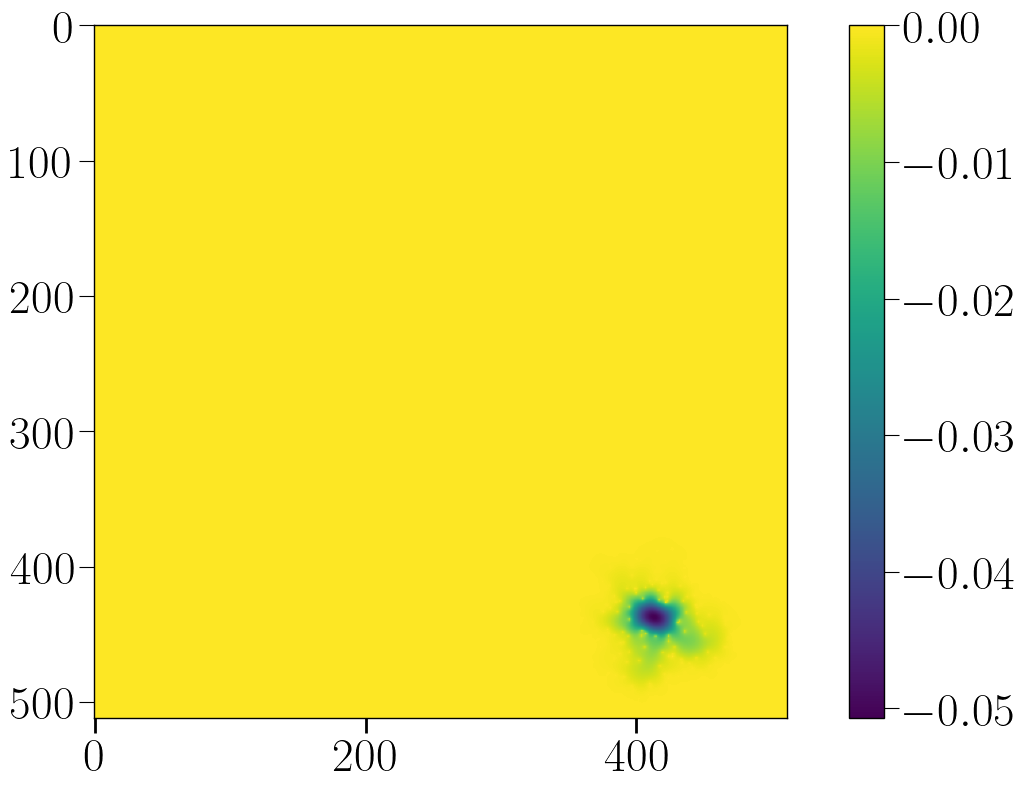

In [4]:
arr = np.load(f"{figpathdat}p=0.01.npy")
# arrneglog = np.nan_to_num(np.log(np.where(arr < 0, -arr, 0)), neginf=0)
# arrposlog = np.nan_to_num(np.log(np.where(arr > 0, arr, 0)), neginf=0)
# arrnan =  np.nan_to_num(np.log(arr), nan=0) - np.nan_to_num(np.log(-arr), nan=0) 
plt.imshow(arr)
plt.colorbar()

In [28]:
merged_dict = {}
for lsize in [32]:
    merged_dict[lsize] = {}
    for p in plist:
        merged_dict[lsize][p] = Counter()
        for avg in range(100):
            lattice = Lattice2D(lsize, pflip=p)
            lattice.flip_random_fract_edges()
            dist_dict = lattice.cluster_distribution_list()
            merged_dict[lsize][p] += Counter(dist_dict)

In [30]:
with open('data.pickle', 'wb') as file:
    pickle.dump(merged_dict, file)

with open('data.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

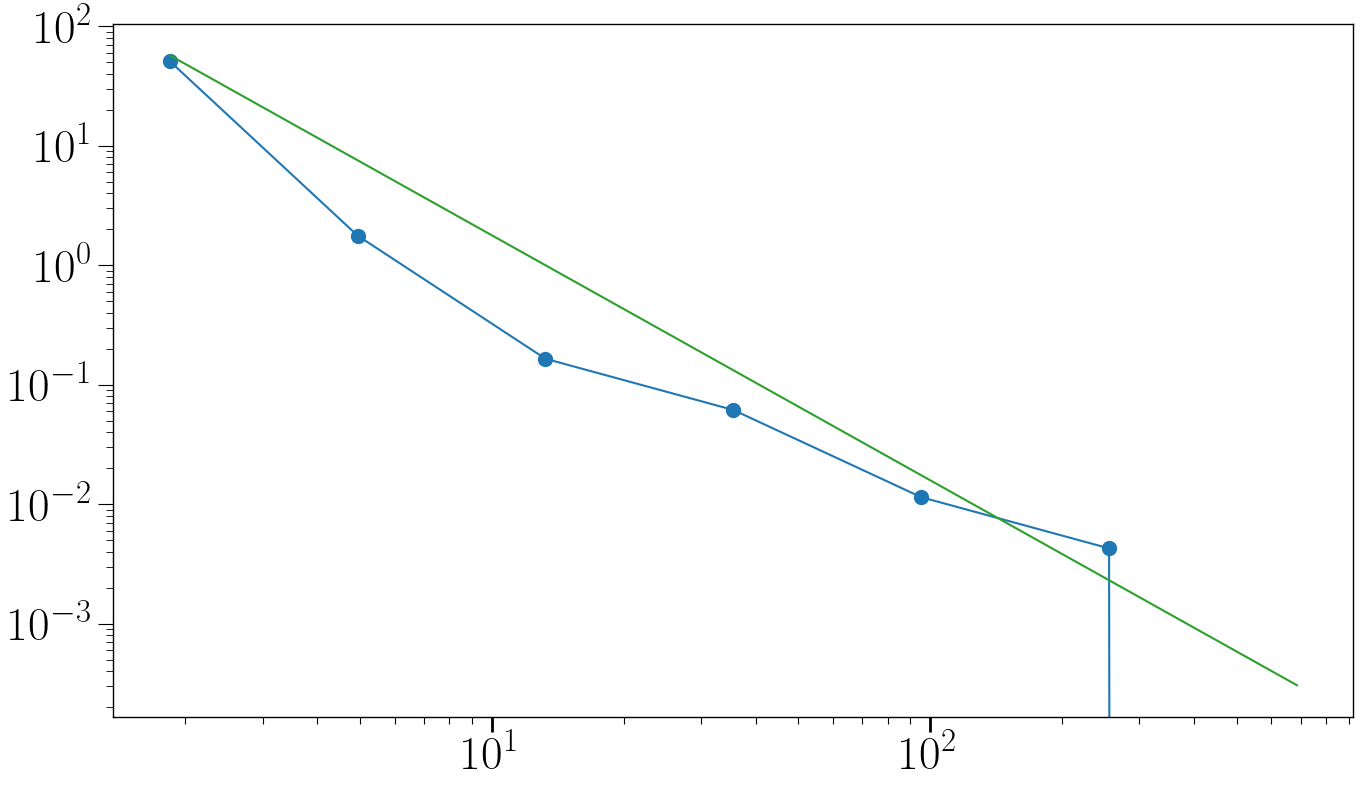

In [27]:
binc, hist, bw = log_binning(list(merged_dict[lsize][p].values()), 8)
plt.plot(binc, hist/bw, 'o-', ms=10)
plt.plot(binc, 200*(1.0*np.array(binc))**(-2.05))
plt.yscale("log")
plt.xscale("log")

In [29]:
merged_dict

{32: {0.01: Counter({1024: 38, 1: 16, 1023: 14, 1022: 2}),
  0.025: Counter({1: 100,
           1021: 14,
           1023: 13,
           1022: 13,
           1020: 6,
           2: 5,
           1019: 3,
           1024: 3,
           1017: 2,
           1016: 1}),
  0.051: Counter({1: 496,
           2: 81,
           3: 25,
           4: 16,
           1013: 7,
           5: 6,
           1005: 5,
           1004: 5,
           1009: 5,
           8: 4,
           1007: 4,
           1010: 4,
           7: 3,
           1014: 3,
           1006: 3,
           1003: 2,
           6: 2,
           997: 2,
           993: 2,
           1011: 2,
           1016: 2,
           1012: 1,
           14: 1,
           33: 1,
           23: 1,
           9: 1,
           983: 1,
           11: 1,
           15: 1}),
  0.103: Counter({1: 982,
           2: 222,
           3: 84,
           4: 46,
           5: 45,
           6: 21,
           7: 14,
           9: 13,
           8: 9,
         

In [ ]:
data_list = [key for key, count in merged_dict.items() for _ in range(count)]

binc, hist, bw = log_binning(data_list, 22)

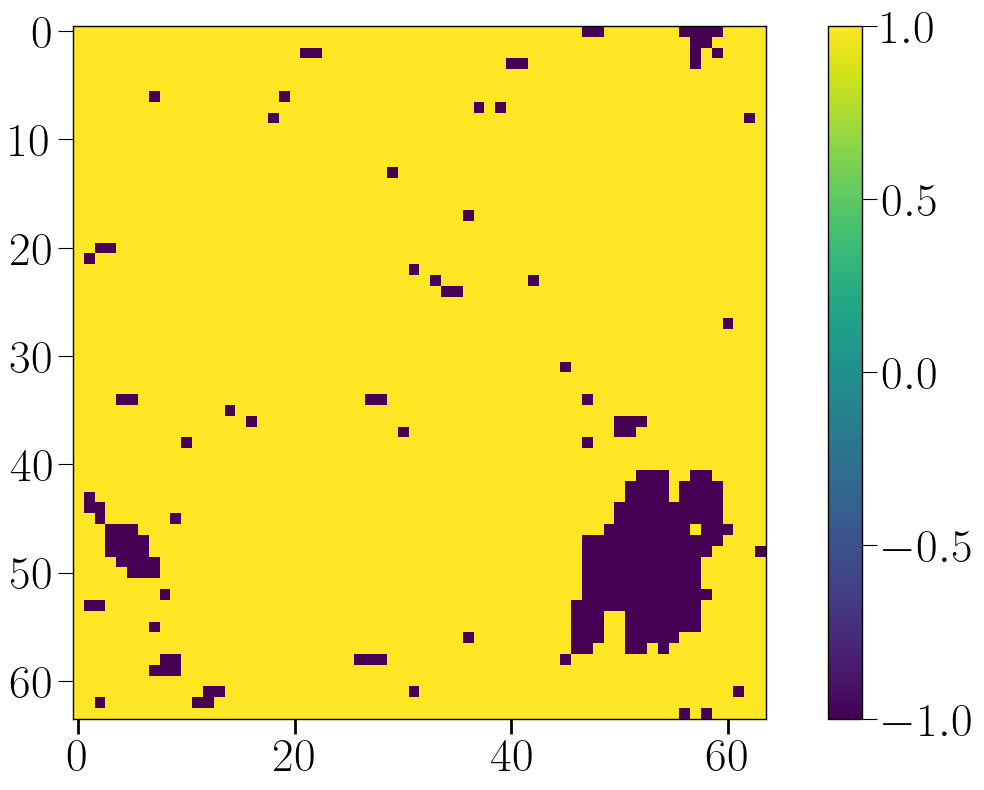

In [6]:
plt.imshow(lattice.bin_eigV().reshape(lattice.syshape))
plt.colorbar()

In [7]:
merged_counter[16]

Counter({1: 9, 252: 1, 254: 1, 250: 1})